*helping investigation agencies deploy police force where the likelihood of crime is higher and aligning supply and logistics with demand forecasts!*

In [ ]:
# importing all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# loading our dataset
df = pd.read_csv("crime_dataset.csv")
df.head()

OBJECTID Occurrence_Category                     Occurrence_Group  \
0         1            Disorder        Provincial Statute Violations   
1         2         Non-Violent  Abandoned/Recovered/Seized Vehicles   
2         3         Non-Violent                             Property   
3         4         Non-Violent                             Property   
4         5             Violent                    Personal Violence   

     Occurrence_Type_Group   Intersection    Date Reported            x  \
0       Intoxicated Person   104 ST/31 AV  January 1, 2022  35592.23361   
1  Recovered Motor Vehicle    62 ST/14 AV  January 1, 2022  37719.20762   
2            Fraud General   140 AV/64 ST  January 1, 2022  37047.16916   
3        Theft Under $5000  153 AV/153 AV  January 1, 2022  33692.76388   
4         Robbery Personal   139 AV/40 ST  January 1, 2022  39439.02591   

             y  
0  5925650.557  
1  5923541.736  
2  5941192.536  
3  5942494.551  
4  5940969.668

In [ ]:
# convert 'Date Reported' to datetime
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%B %d, %Y')
# extracting year, month and day
df['Year'] = df['Date Reported'].dt.year
df['Month'] = df['Date Reported'].dt.month
df['DayName'] = df['Date Reported'].dt.day_name()

# mapping month number to month name
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['Month'] = df['Month'].map(month_map)
df

OBJECTID Occurrence_Category                     Occurrence_Group  \
0              1            Disorder        Provincial Statute Violations   
1              2         Non-Violent  Abandoned/Recovered/Seized Vehicles   
2              3         Non-Violent                             Property   
3              4         Non-Violent                             Property   
4              5             Violent                    Personal Violence   
...          ...                 ...                                  ...   
241681    241682         Non-Violent                             Property   
241682    241683             Violent                    Personal Violence   
241683    241684         Non-Violent                             Property   
241684    241685         Non-Violent                             Property   
241685    241686            Disorder                     General Disorder   

             Occurrence_Type_Group           Intersection Date Reported  \
0               Intoxicated Person           104 ST/31 AV    2022-01-01   
1          Recovered Motor Vehicle            62 ST/14 AV    2022-01-01   
2                    Fraud General           140 AV/64 ST    2022-01-01   
3                Theft Under $5000          153 AV/153 AV    2022-01-01   
4                 Robbery Personal           139 AV/40 ST    2022-01-01   
...                            ...                    ...           ...   
241681  Break and Enter Commercial           42 AV/105 ST    2024-12-31   
241682                     Assault            81 AV/81 AV    2024-12-31   
241683      Theft of Motor Vehicle  179 ST/STONY PLAIN RD    2024-12-31   
241684  Break and Enter Commercial          111 AV/184 ST    2024-12-31   
241685                 Trespassing          103 AV/106 ST    2024-12-31   

                  x            y  Year     Month   DayName  
0       35592.23361  5925650.557  2022   January  Saturday  
1       37719.20762  5923541.736  2022   January  Saturday  
2       37047.16916  5941192.536  2022   January  Saturday  
3       33692.76388  5942494.551  2022   January  Saturday  
4       39439.02591  5940969.668  2022   January  Saturday  
...             ...          ...   ...       ...       ...  
241681  33106.14613  5927428.594  2024  December   Tuesday  
241682  34107.71829  5931693.957  2024  December   Tuesday  
241683  24459.46273  5934364.140  2024  December   Tuesday  
241684  23878.05940  5936364.699  2024  December   Tuesday  
241685  32947.78221  5934751.546  2024  December   Tuesday  

[241686 rows x 11 columns]

In [ ]:
# checking for any null values in our dataset
df.isnull()

OBJECTID  Occurrence_Category  Occurrence_Group  \
0          False                False             False   
1          False                False             False   
2          False                False             False   
3          False                False             False   
4          False                False             False   
...          ...                  ...               ...   
241681     False                False             False   
241682     False                False             False   
241683     False                False             False   
241684     False                False             False   
241685     False                False             False   

        Occurrence_Type_Group  Intersection  Date Reported      x      y  \
0                       False         False          False  False  False   
1                       False         False          False  False  False   
2                       False         False          False  False  False   
3                       False         False          False  False  False   
4                       False         False          False  False  False   
...                       ...           ...            ...    ...    ...   
241681                  False         False          False  False  False   
241682                  False         False          False  False  False   
241683                  False         False          False  False  False   
241684                  False         False          False  False  False   
241685                  False         False          False  False  False   

         Year  Month  DayName  
0       False  False    False  
1       False  False    False  
2       False  False    False  
3       False  False    False  
4       False  False    False  
...       ...    ...      ...  
241681  False  False    False  
241682  False  False    False  
241683  False  False    False  
241684  False  False    False  
241685  False  False    False  

[241686 rows x 11 columns]

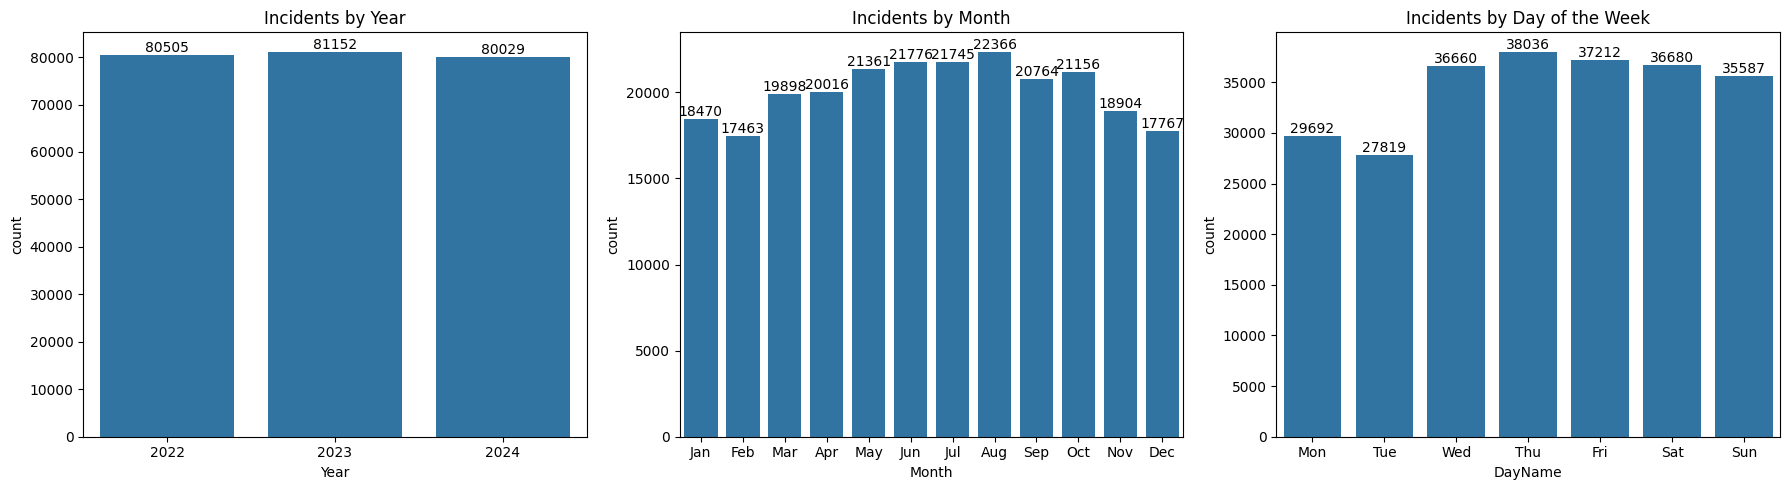

In [ ]:
# to visualize crime numbers by year, month and day
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
y = sns.countplot(df, x='Year')
for container in y.containers:
    y.bar_label(container)
plt.title('Incidents by Year')

plt.subplot(1, 3, 2)
m = sns.countplot(df, x='Month')
for container in m.containers:
    m.bar_label(container)
plt.title('Incidents by Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])

plt.subplot(1, 3, 3)
d = sns.countplot(df, x='DayName')
for container in d.containers:
    d.bar_label(container)
plt.title('Incidents by Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

In [ ]:
# this was done to make the map visualization process much easier
data = df[['x', 'y','Occurrence_Type_Group']]
data

x            y       Occurrence_Type_Group
0       35592.23361  5925650.557          Intoxicated Person
1       37719.20762  5923541.736     Recovered Motor Vehicle
2       37047.16916  5941192.536               Fraud General
3       33692.76388  5942494.551           Theft Under $5000
4       39439.02591  5940969.668            Robbery Personal
...             ...          ...                         ...
241681  33106.14613  5927428.594  Break and Enter Commercial
241682  34107.71829  5931693.957                     Assault
241683  24459.46273  5934364.140      Theft of Motor Vehicle
241684  23878.05940  5936364.699  Break and Enter Commercial
241685  32947.78221  5934751.546                 Trespassing

[241686 rows x 3 columns]

In [ ]:
!pip install folium

In [ ]:
import folium
from pyproj import CRS, Transformer

# to avoid the settingwithcopy warning, we make a copy of 'data'
df_filtered = data.copy()

# defining the source and destination projections
source_crs = CRS("EPSG:3776")
dest_crs = CRS("EPSG:4326")
transformer = Transformer.from_crs(source_crs, dest_crs, always_xy=True) # creating a transformer

# convert the coordinates of the filtered dataframe
df_filtered['lon'], df_filtered['lat'] = transformer.transform(data['x'].values, data['y'].values)

edmonton_map = folium.Map(location=[53.55014000, -113.46871000], zoom_start=11) # map centered on edmonton

# display the map
for index, row in df_filtered.sample(n = 1000, random_state=42).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(edmonton_map)
edmonton_map

In [ ]:
all_crime_types = df['Occurrence_Type_Group'].unique()
all_crime_types.tolist()

['Intoxicated Person',
 'Recovered Motor Vehicle',
 'Fraud General',
 'Theft Under $5000',
 'Robbery Personal',
 'Trouble with Person',
 'Mischief - Property',
 'Assault',
 'Theft of Motor Vehicle',
 'Break and Enter Residential',
 'Fraud - Financial',
 'Abandoned Vehicle',
 'Break and Enter Commercial',
 'Dispute',
 'Weapons Complaint',
 'Trespassing',
 'Theft Over $5000',
 'Robbery Commercial',
 'Fraud Personal',
 'Drugs',
 'Weapons Complaint Firearm',
 'Fire Arson',
 'Graffiti',
 'Internet Fraud',
 'Impaired Driving',
 'Criminal Flight Event',
 'Suspicious Person',
 'Disturbance',
 'Possession Stolen Property',
 'Public Mischief',
 'Property Damage',
 'Suspicious Vehicle',
 'Indecent Act',
 'Liquor Act',
 'Dangerous Condition',
 'Counterfeit Money',
 'Technology/Internet Crime',
 'Homicide',
 'Public Health Act',
 'Bomb Threat',
 'Labour Dispute',
 'Workplace Accident']

In [ ]:
# this map visualization makes it easier for us to understand what kind of crime is taking at place
import matplotlib.cm as cm
import matplotlib.colors as colors

num_crime_types = len(all_crime_types)
cmap = cm.get_cmap('tab20b', num_crime_types)

crime_color_map = {}
for i, crime_type in enumerate(all_crime_types):
    rgba_color = cmap(i) # get an rgba color from the colormap
    hex_color = colors.rgb2hex(rgba_color) # converting to hex string for Folium
    crime_color_map[crime_type] = hex_color

print("\n--- Generated Crime Type Colors ---")
for crime, color in crime_color_map.items():
    print(f"- {crime}: {color}")
print("-" * 50)

for index, row in df_filtered.sample(n=5000, random_state=42).iterrows():
    crime_type = row['Occurrence_Type_Group']

    marker_color = crime_color_map.get(crime_type, 'black')

    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        tooltip=f"{crime_type}" # tooltip to show crime type on hover
    ).add_to(edmonton_map)
edmonton_map



/tmp/ipython-input-1860376230.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20b', num_crime_types)



--- Generated Crime Type Colors ---
- Intoxicated Person: #393b79
- Recovered Motor Vehicle: #393b79
- Fraud General: #393b79
- Theft Under $5000: #5254a3
- Robbery Personal: #5254a3
- Trouble with Person: #6b6ecf
- Mischief - Property: #6b6ecf
- Assault: #9c9ede
- Theft of Motor Vehicle: #9c9ede
- Break and Enter Residential: #637939
- Fraud - Financial: #637939
- Abandoned Vehicle: #8ca252
- Break and Enter Commercial: #8ca252
- Dispute: #b5cf6b
- Weapons Complaint: #b5cf6b
- Trespassing: #cedb9c
- Theft Over $5000: #cedb9c
- Robbery Commercial: #8c6d31
- Fraud Personal: #8c6d31
- Drugs: #bd9e39
- Weapons Complaint Firearm: #bd9e39
- Fire Arson: #e7ba52
- Graffiti: #e7ba52
- Internet Fraud: #e7cb94
- Impaired Driving: #e7cb94
- Criminal Flight Event: #843c39
- Suspicious Person: #843c39
- Disturbance: #ad494a
- Possession Stolen Property: #ad494a
- Public Mischief: #d6616b
- Property Damage: #d6616b
- Suspicious Vehicle: #e7969c
- Indecent Act: #e7969c
- Liquor Act: #7b4173
- Danger

In [ ]:
# to find the count of each group
x = df.groupby('Occurrence_Type_Group').size()
print(x)

Occurrence_Type_Group
Abandoned Vehicle                668
Assault                        19126
Bomb Threat                       58
Break and Enter Commercial      7501
Break and Enter Residential    11645
Counterfeit Money                284
Criminal Flight Event           1866
Dangerous Condition               47
Dispute                         5907
Disturbance                     1275
Drugs                           3157
Fire Arson                      1219
Fraud - Financial               6770
Fraud General                   3761
Fraud Personal                  2744
Graffiti                         842
Homicide                         124
Impaired Driving                4043
Indecent Act                     486
Internet Fraud                  4926
Intoxicated Person              5492
Labour Dispute                    18
Liquor Act                       406
Mischief - Property            18957
Possession Stolen Property      3706
Property Damage                  330
Public Health Ac

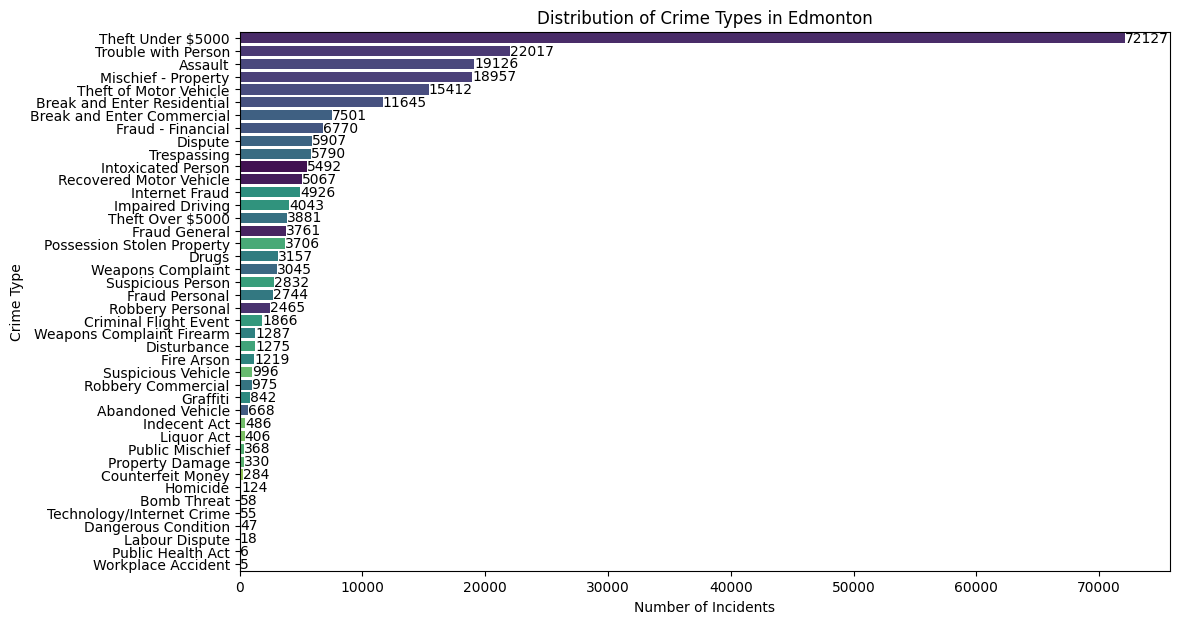

In [ ]:
# to visualize crime type distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
p = sns.countplot(df, y='Occurrence_Type_Group', hue = 'Occurrence_Type_Group',order=df['Occurrence_Type_Group'].value_counts().index, palette='viridis',legend=False)
plt.title('Distribution of Crime Types in Edmonton')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')

for container in p.containers:
    p.bar_label(container)
plt.show()



In [ ]:
# to see which area has the highest crime rate and what are the most occuring types of crime

df['Date Reported'] = pd.to_datetime(df['Date Reported'], infer_datetime_format=True, errors='coerce')
df.dropna(subset=['Date Reported'], inplace=True)

# re-create spatial binning columns
x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()
grid_size_x = 500
grid_size_y = 500
df['Grid_X'] = ((df['x'] - x_min) // grid_size_x).astype(int)
df['Grid_Y'] = ((df['y'] - y_min) // grid_size_y).astype(int)
df['Grid_Cell_ID'] = df['Grid_X'].astype(str) + '_' + df['Grid_Y'].astype(str)

print("\nData preparation complete for area crime analysis.")
print("First 5 rows of `df_incidents` with Grid_Cell_ID:")
print(df.head())

/tmp/ipython-input-551376481.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date Reported'] = pd.to_datetime(df['Date Reported'], infer_datetime_format=True, errors='coerce')



Data preparation complete for area crime analysis.
First 5 rows of `df_incidents` with Grid_Cell_ID:
   OBJECTID Occurrence_Category                     Occurrence_Group  \
0         1            Disorder        Provincial Statute Violations   
1         2         Non-Violent  Abandoned/Recovered/Seized Vehicles   
2         3         Non-Violent                             Property   
3         4         Non-Violent                             Property   
4         5             Violent                    Personal Violence   

     Occurrence_Type_Group   Intersection Date Reported            x  \
0       Intoxicated Person   104 ST/31 AV    2022-01-01  35592.23361   
1  Recovered Motor Vehicle    62 ST/14 AV    2022-01-01  37719.20762   
2            Fraud General   140 AV/64 ST    2022-01-01  37047.16916   
3        Theft Under $5000  153 AV/153 AV    2022-01-01  33692.76388   
4         Robbery Personal   139 AV/40 ST    2022-01-01  39439.02591   

             y  Year    Month   

In [ ]:
# --- 1. Calculate Total Incidents per Grid Cell ---
print("\n--- Identifying Areas with the Most Crimes ---")

# Group by Grid_Cell_ID and count incidents
area_crime_counts = df.groupby('Grid_Cell_ID').size().reset_index(name='Total_Incidents')

# Sort to find the areas with the highest crime counts
top_areas = area_crime_counts.sort_values(by='Total_Incidents', ascending=False)

print("\nTop 10 Grid Cells with the Highest Total Incidents:")
print(top_areas.head(10))


--- Identifying Areas with the Most Crimes ---

Top 10 Grid Cells with the Highest Total Incidents:
     Grid_Cell_ID  Total_Incidents
725         25_50             3359
879         28_46             3079
934         29_47             2888
623         23_58             2880
932         29_45             2465
66          11_41             2269
933         29_46             2150
1495        39_57             2103
878         28_45             2082
762         26_33             1791


In [ ]:
# --- 2. For the Top Areas, Identify What Kind of Crimes ---
print("\n--- Breaking Down Crime Types in Top Areas ---")

# Select the top N grid cells for detailed analysis (e.g., top 5)
num_top_areas_to_analyze = 5
top_n_grid_ids = top_areas['Grid_Cell_ID'].head(num_top_areas_to_analyze).tolist()

for grid_id in top_n_grid_ids:
    print(f"\n--- Analysis for Grid Cell ID: {grid_id} ---")

    # Filter incidents for the current grid cell
    incidents_in_area = df[df['Grid_Cell_ID'] == grid_id]

    # Get total incidents in this specific area
    total_incidents_in_area = len(incidents_in_area)
    print(f"Total Incidents in this area: {total_incidents_in_area}")

    # Count crime categories
    crime_category_counts = incidents_in_area['Occurrence_Category'].value_counts().reset_index()
    crime_category_counts.columns = ['Occurrence_Category', 'Count']
    crime_category_counts['Percentage'] = (crime_category_counts['Count'] / total_incidents_in_area) * 100

    print("\nTop Crime Categories in this Area:")
    print(crime_category_counts.head()) # Show top categories for this grid cell

    # Count more specific crime types (Occurrence_Type_Group)
    crime_type_group_counts = incidents_in_area['Occurrence_Type_Group'].value_counts().reset_index()
    crime_type_group_counts.columns = ['Occurrence_Type_Group', 'Count']
    crime_type_group_counts['Percentage'] = (crime_type_group_counts['Count'] / total_incidents_in_area) * 100

    print("\nTop Specific Crime Types (Occurrence_Type_Group) in this Area:")
    print(crime_type_group_counts.head()) # Show top specific types for this grid cell

print("\nAnalysis complete. You can inspect the output to see the top crime types for each of the highest crime areas.")


--- Breaking Down Crime Types in Top Areas ---

--- Analysis for Grid Cell ID: 25_50 ---
Total Incidents in this area: 3359

Top Crime Categories in this Area:
  Occurrence_Category  Count  Percentage
0         Non-Violent   3175   94.522179
1            Disorder    120    3.572492
2             Violent     46    1.369455
3               Drugs      9    0.267937
4             Weapons      5    0.148854

Top Specific Crime Types (Occurrence_Type_Group) in this Area:
        Occurrence_Type_Group  Count  Percentage
0           Theft Under $5000   3069   91.366478
1         Trouble with Person     46    1.369455
2                     Assault     35    1.041977
3         Mischief - Property     34    1.012206
4  Break and Enter Commercial     18    0.535874

--- Analysis for Grid Cell ID: 28_46 ---
Total Incidents in this area: 3079

Top Crime Categories in this Area:
  Occurrence_Category  Count  Percentage
0         Non-Violent   1317   42.773628
1            Disorder   1011   32.835336

In [ ]:
grid = df[['x', 'y','Grid_Cell_ID']]
grid

x            y Grid_Cell_ID
0       35592.23361  5925650.557        33_27
1       37719.20762  5923541.736        37_23
2       37047.16916  5941192.536        36_59
3       33692.76388  5942494.551        29_61
4       39439.02591  5940969.668        40_58
...             ...          ...          ...
241681  33106.14613  5927428.594        28_31
241682  34107.71829  5931693.957        30_40
241683  24459.46273  5934364.140        10_45
241684  23878.05940  5936364.699         9_49
241685  32947.78221  5934751.546        27_46

[241686 rows x 3 columns]